# Import necessary libraries

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# Disable XLA
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices=false'

# Set logging level to avoid unnecessary warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')

# Clear TensorFlow session
from tensorflow.keras import backend as K
K.clear_session()

# Load DataSet

In [3]:
dataset_path = "/kaggle/input/leapgestrecog/leapGestRecog"

# Data preprocessing
****

In [4]:
os.listdir('/kaggle/input/leapgestrecog/leapGestRecog')

['07', '05', '06', '02', '04', '00', '08', '09', '03', '01']

# Parameters

In [5]:
batch_size = 32
img_size = 224
num_classes = 10

# Create a function to get the file paths and labels

In [6]:
def get_file_paths_and_labels(base_path):
    file_paths = []
    labels = []
    gesture_folders = [
        '01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', 
        '06_index', '07_ok', '08_palm_moved', '09_c', '10_down'
    ]
    label_map = {gesture: idx for idx, gesture in enumerate(gesture_folders)}
    
    for subject in os.listdir(base_path):
        subject_path = os.path.join(base_path, subject)
        if os.path.isdir(subject_path):
            for gesture in gesture_folders:
                gesture_path = os.path.join(subject_path, gesture)
                if os.path.isdir(gesture_path):
                    for img_file in os.listdir(gesture_path):
                        img_path = os.path.join(gesture_path, img_file)
                        file_paths.append(img_path)
                        labels.append(label_map[gesture])
    return file_paths, labels

# Function to display images

In [7]:
def display_images(file_paths, labels, label_map):
    unique_labels = list(label_map.values())
    label_to_name = {v: k for k, v in label_map.items()}
    
    plt.figure(figsize=(20, 20))
    for idx, label in enumerate(unique_labels):
        label_paths = [file_paths[i] for i in range(len(labels)) if labels[i] == label][:5]
        for i, img_path in enumerate(label_paths):
            img = load_img(img_path, color_mode='grayscale', target_size=(img_size, img_size))
            img = img_to_array(img) / 255.0
            plt.subplot(len(unique_labels), 5, idx * 5 + i + 1)
            plt.imshow(img.squeeze(), cmap='gray')
            plt.title(label_to_name[label])
            plt.axis('off')
    plt.show()

# Get the file paths and labels

In [8]:
file_paths, labels = get_file_paths_and_labels(dataset_path)

In [9]:
print(f"First 10 file paths: {file_paths[:10]}")
print(f"First 10 labels: {labels[:10]}")

First 10 file paths: ['/kaggle/input/leapgestrecog/leapGestRecog/07/01_palm/frame_07_01_0175.png', '/kaggle/input/leapgestrecog/leapGestRecog/07/01_palm/frame_07_01_0097.png', '/kaggle/input/leapgestrecog/leapGestRecog/07/01_palm/frame_07_01_0144.png', '/kaggle/input/leapgestrecog/leapGestRecog/07/01_palm/frame_07_01_0083.png', '/kaggle/input/leapgestrecog/leapGestRecog/07/01_palm/frame_07_01_0096.png', '/kaggle/input/leapgestrecog/leapGestRecog/07/01_palm/frame_07_01_0182.png', '/kaggle/input/leapgestrecog/leapGestRecog/07/01_palm/frame_07_01_0160.png', '/kaggle/input/leapgestrecog/leapGestRecog/07/01_palm/frame_07_01_0192.png', '/kaggle/input/leapgestrecog/leapGestRecog/07/01_palm/frame_07_01_0152.png', '/kaggle/input/leapgestrecog/leapGestRecog/07/01_palm/frame_07_01_0116.png']
First 10 labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Check if we got any file paths and labels

In [10]:
if not file_paths or not labels:
    raise ValueError("No file paths or labels found. Please check the dataset path and structure.")

# Complete DataSet images Display 

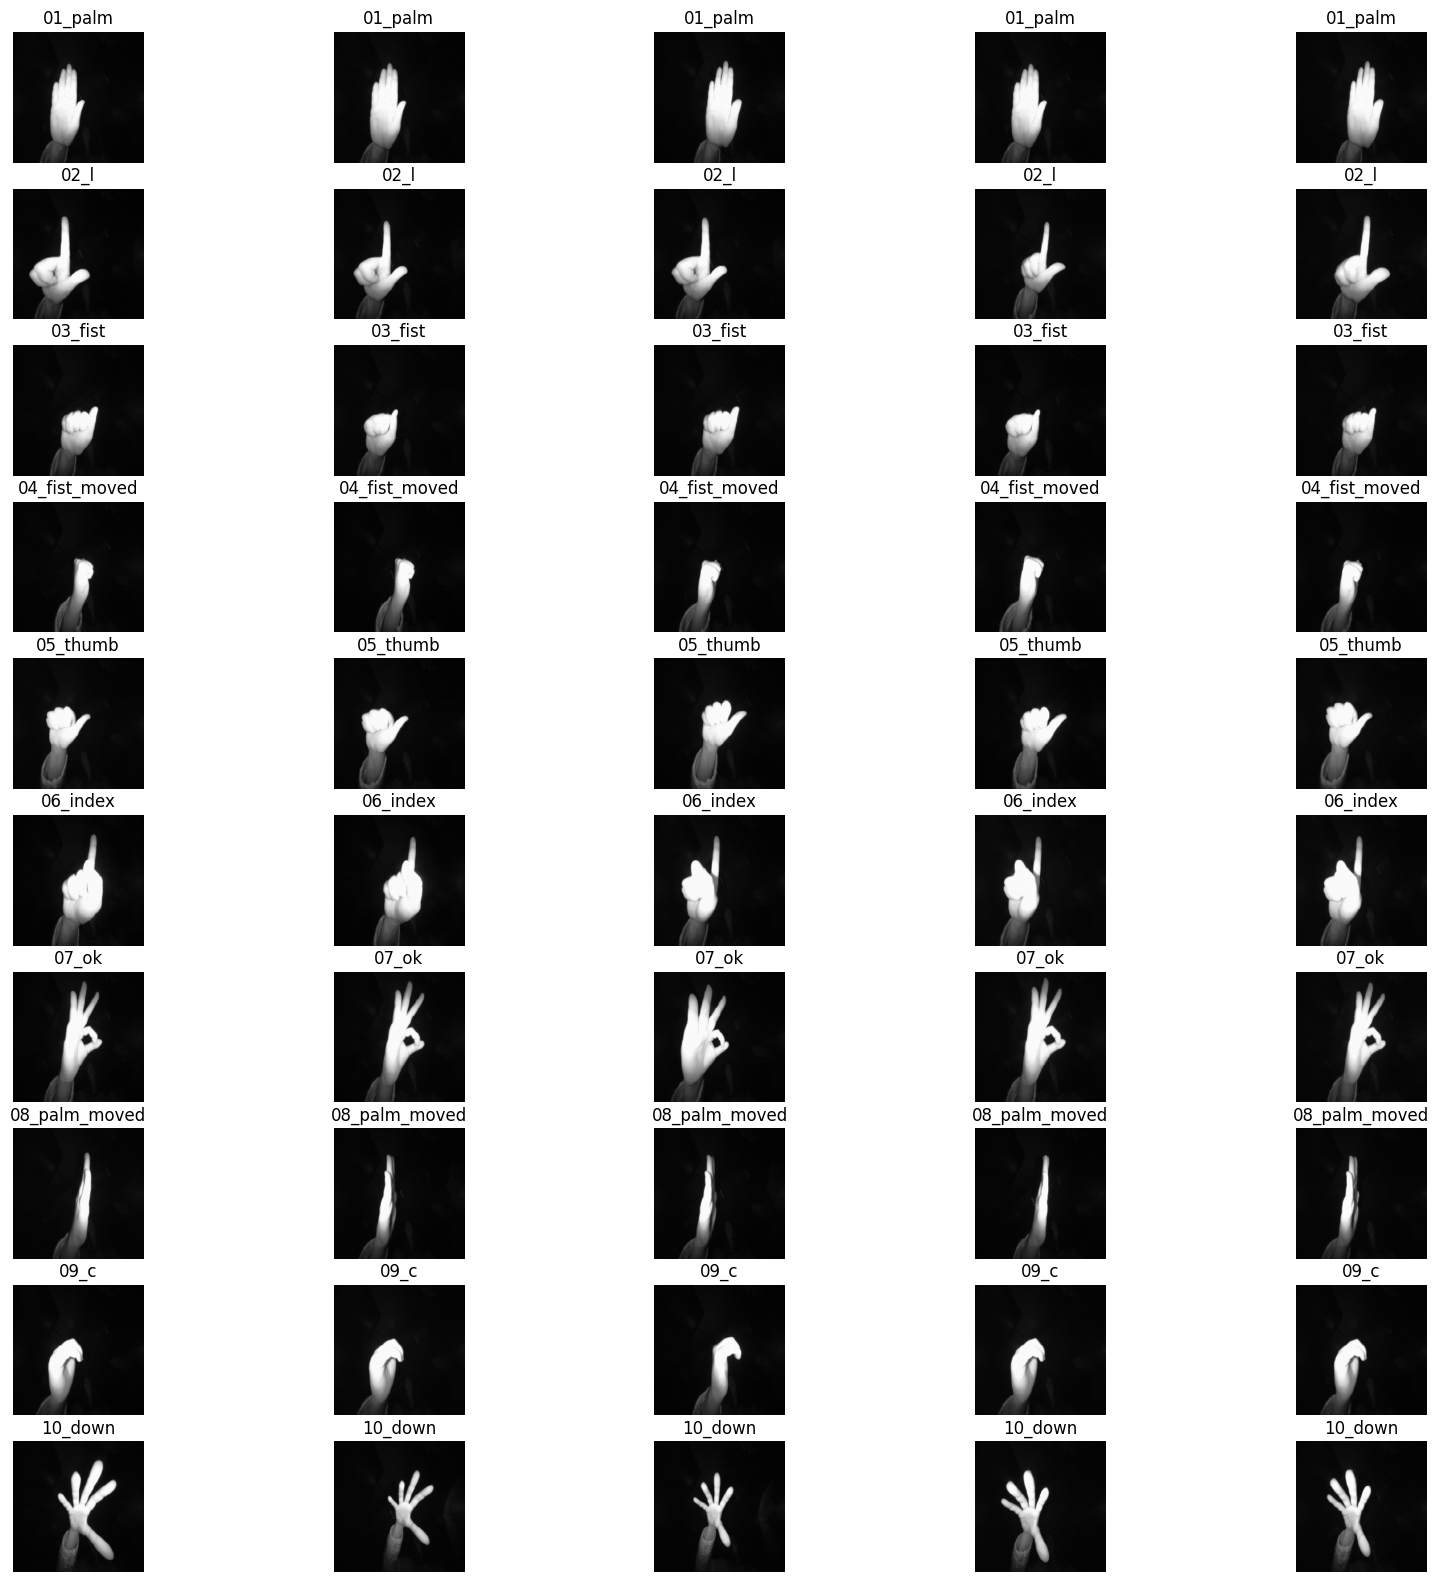

In [11]:
# Label map
gesture_folders = [
    '01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', 
    '06_index', '07_ok', '08_palm_moved', '09_c', '10_down'
]
label_map = {gesture: idx for idx, gesture in enumerate(gesture_folders)}

# Display the images
display_images(file_paths, labels, label_map)

# Function to Print 10 Images from '01_palm'

In [12]:
def get_file_paths_01_palm(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '01_palm')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

# Function to display images from '01_palm

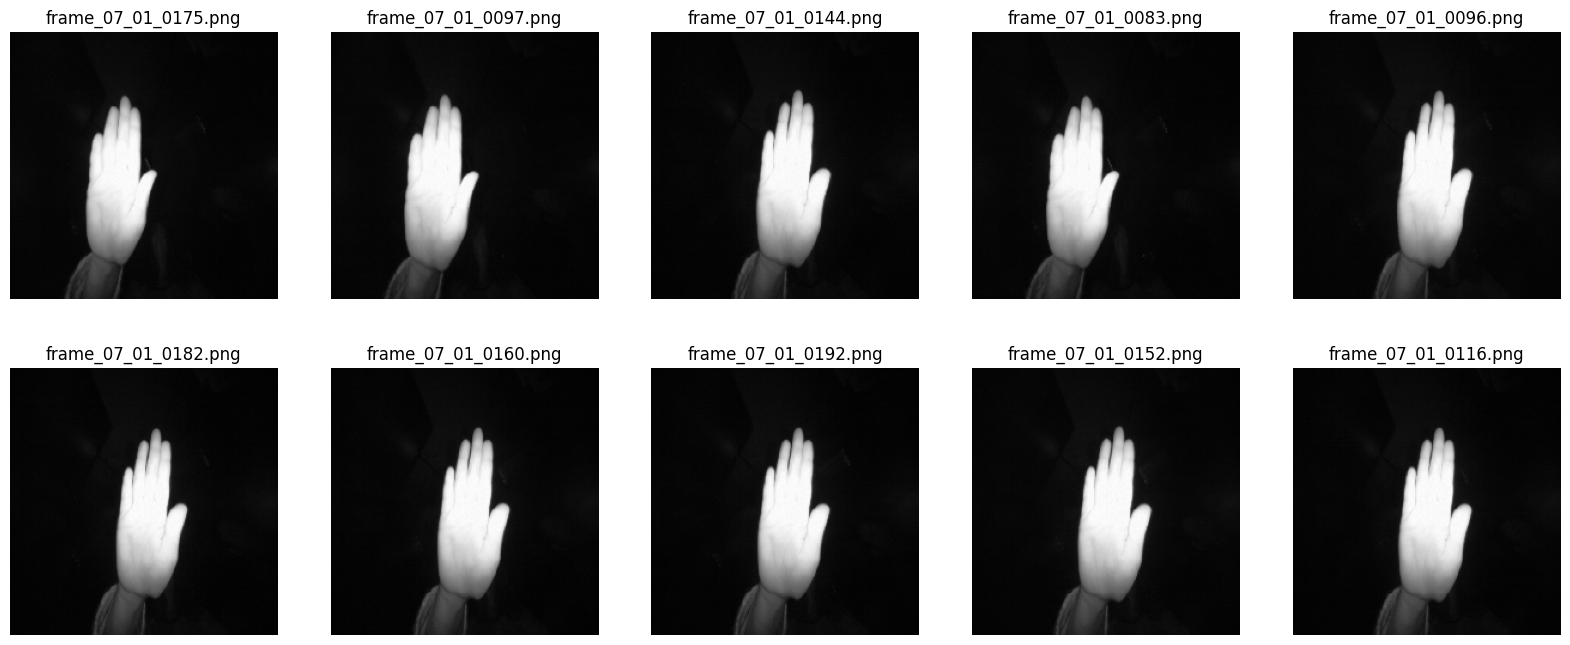

In [13]:
# Function to display images in two rows
def display_images(file_paths):
    plt.figure(figsize=(20, 8))
    for i, img_path in enumerate(file_paths[:10]):  # Ensure only 10 images are displayed
        img = load_img(img_path, color_mode='grayscale', target_size=(img_size, img_size))
        img = img_to_array(img) / 255.0
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(os.path.basename(img_path))
        plt.axis('off')
    plt.show()

# Get the file paths
file_paths_01_palm = get_file_paths_01_palm(dataset_path)

# Display the images
display_images(file_paths_01_palm)

# Function to Print 10 Images from '02_l'

In [14]:
def get_file_paths_02_l(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '02_l')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths


 # Display images from '02_l'

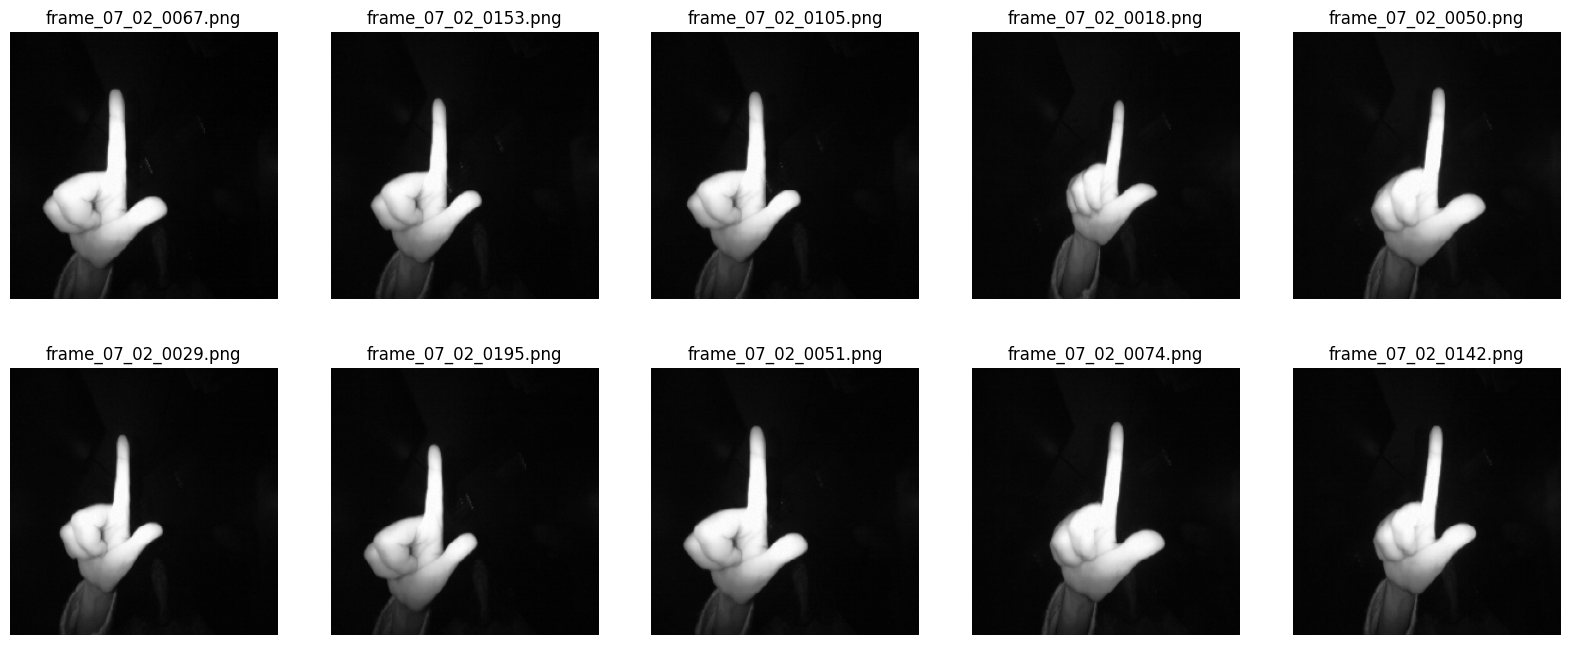

In [15]:
# Get the file paths
file_paths_02_l = get_file_paths_02_l(dataset_path)

# Display the images
display_images(file_paths_02_l)

# Function to Print 10 Images from '03_fist'

In [16]:
def get_file_paths_03_fist(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '03_fist')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths


# Display Images From '03_fist'

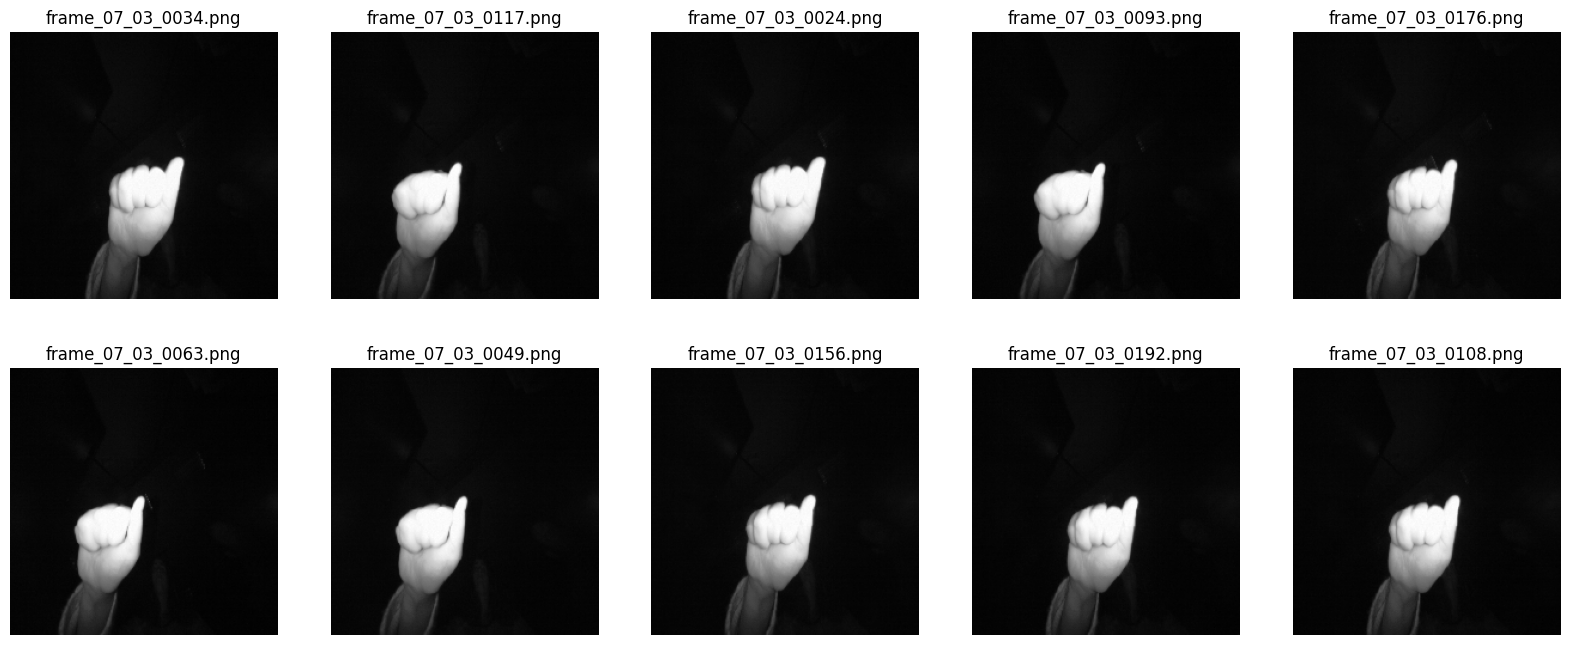

In [17]:
# Get the file paths
file_paths_03_fist = get_file_paths_03_fist(dataset_path)

# Display the images
display_images(file_paths_03_fist)

# Function to Print 10 Images from '04_fist_moved'

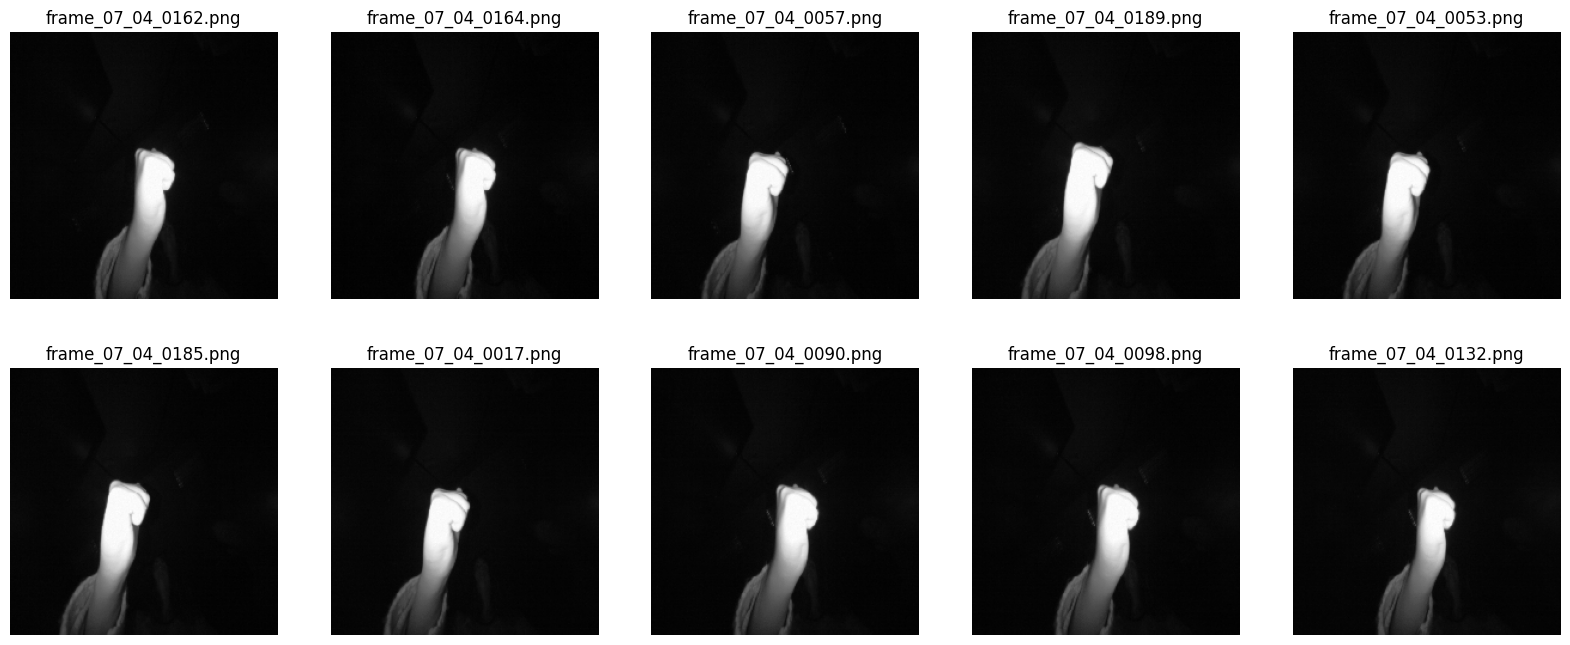

In [18]:
def get_file_paths_04_fist_moved(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '04_fist_moved')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_04_fist_moved = get_file_paths_04_fist_moved(dataset_path)
display_images(file_paths_04_fist_moved)

# Function to Print 10 Images from '05_thumb'

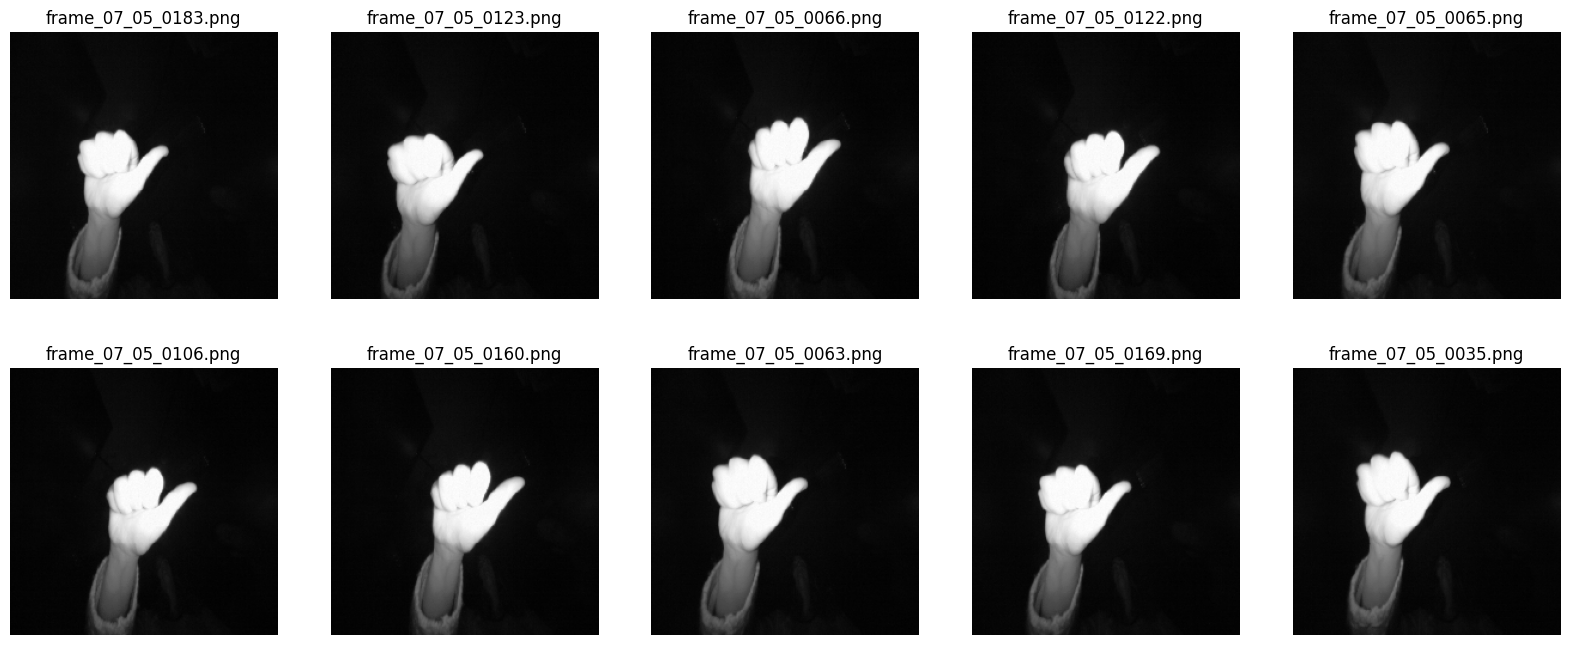

In [19]:
def get_file_paths_05_thumb(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '05_thumb')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_05_thumb = get_file_paths_05_thumb(dataset_path)
display_images(file_paths_05_thumb)

# Function to Print 10 Images from '06_index'

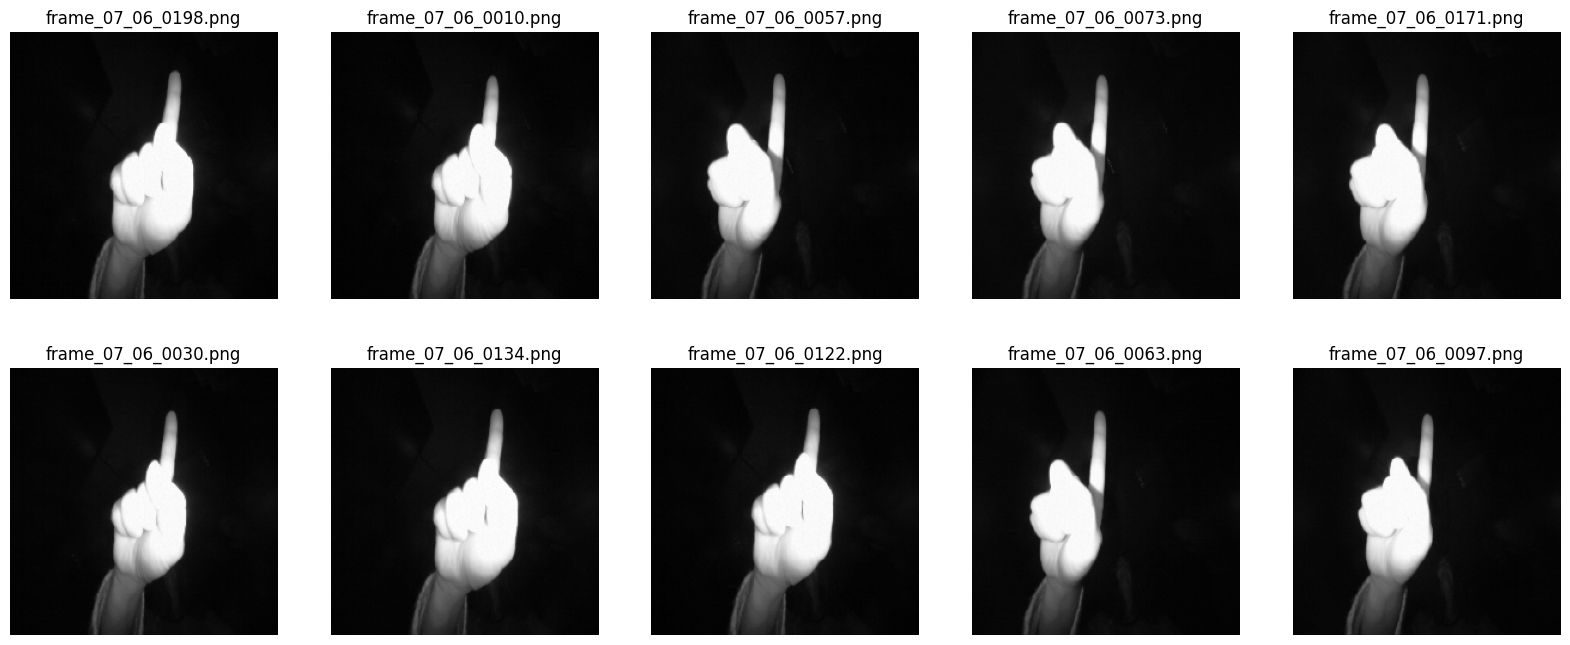

In [20]:
def get_file_paths_06_index(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '06_index')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_06_index = get_file_paths_06_index(dataset_path)
display_images(file_paths_06_index)

# Function to Print 10 Images from '07_ok'

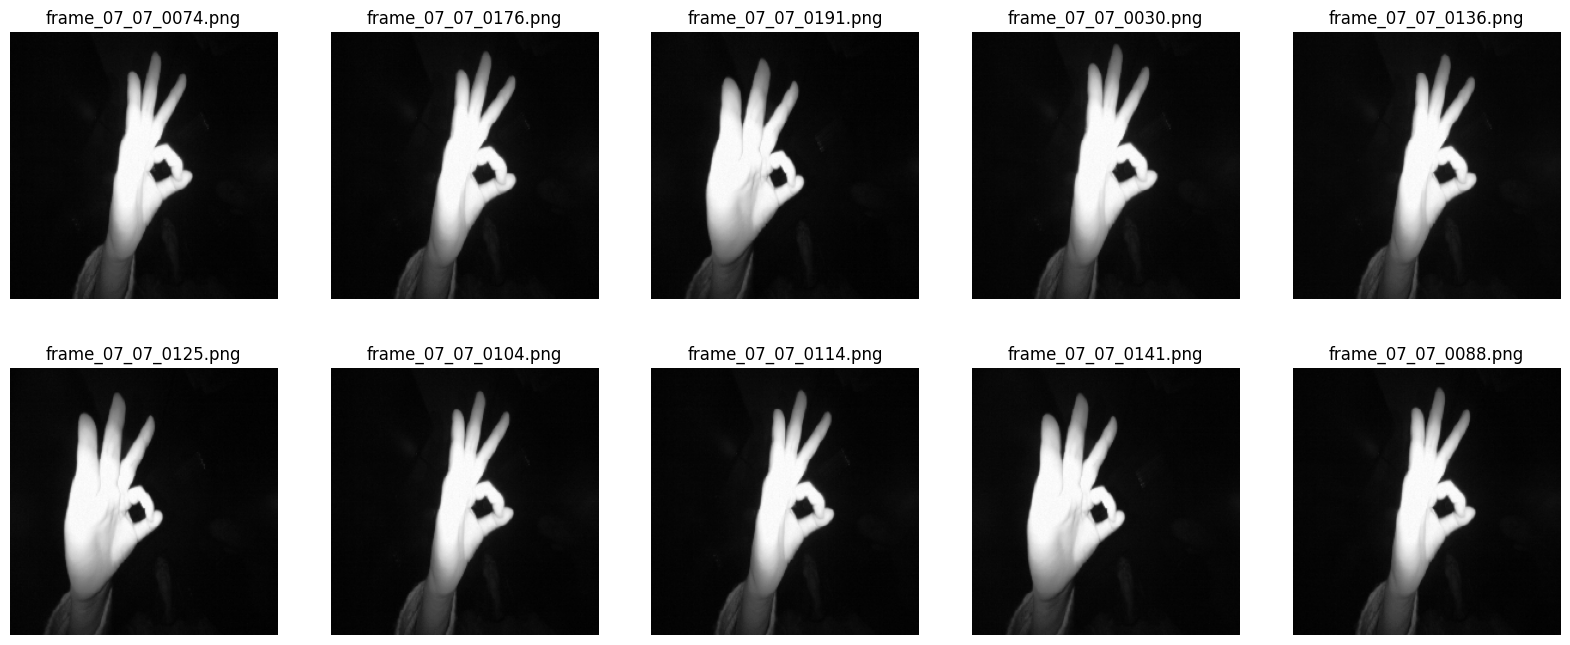

In [21]:
def get_file_paths_07_ok(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '07_ok')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_07_ok = get_file_paths_07_ok(dataset_path)
display_images(file_paths_07_ok)

# Function to Print 10 Images from '08_palm_moved'

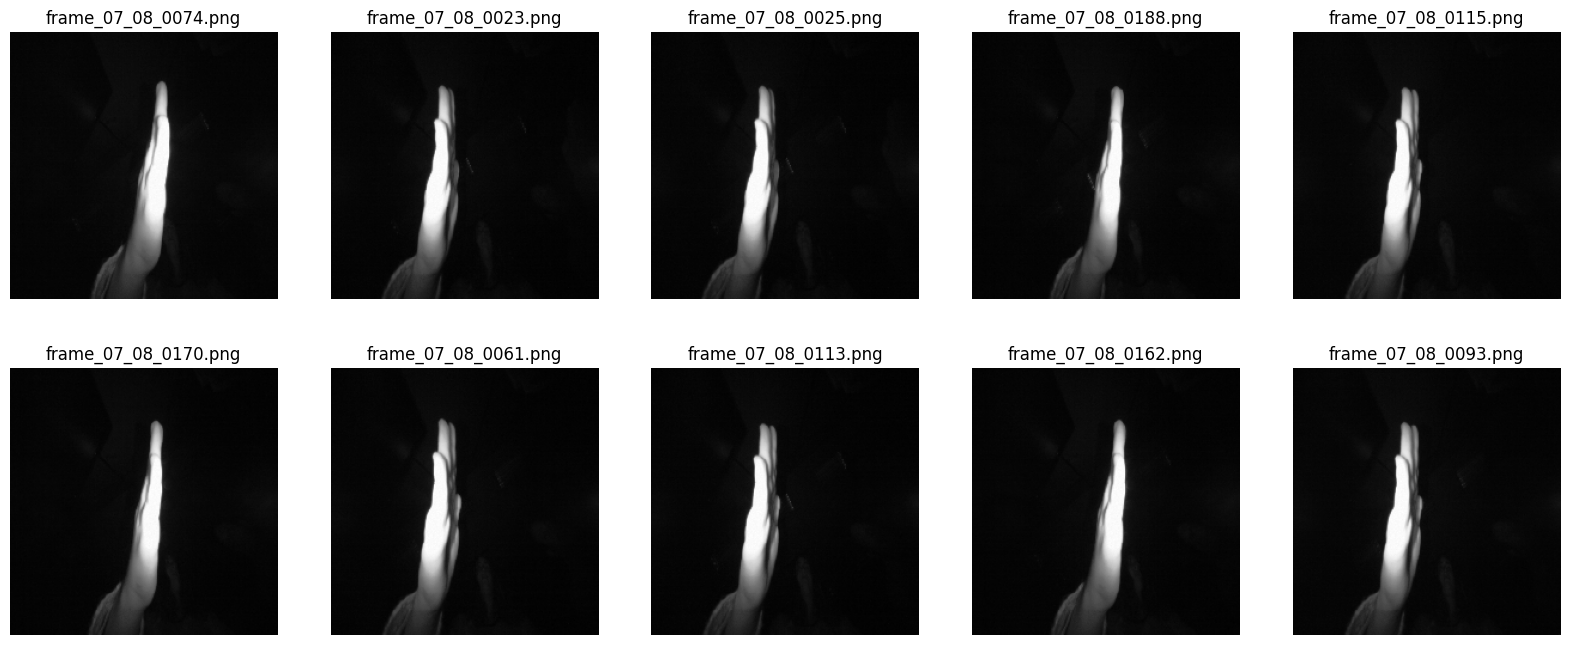

In [22]:
def get_file_paths_08_palm_moved(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '08_palm_moved')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_08_palm_moved = get_file_paths_08_palm_moved(dataset_path)
display_images(file_paths_08_palm_moved)

# Function to Print 10 Images from '09_c'

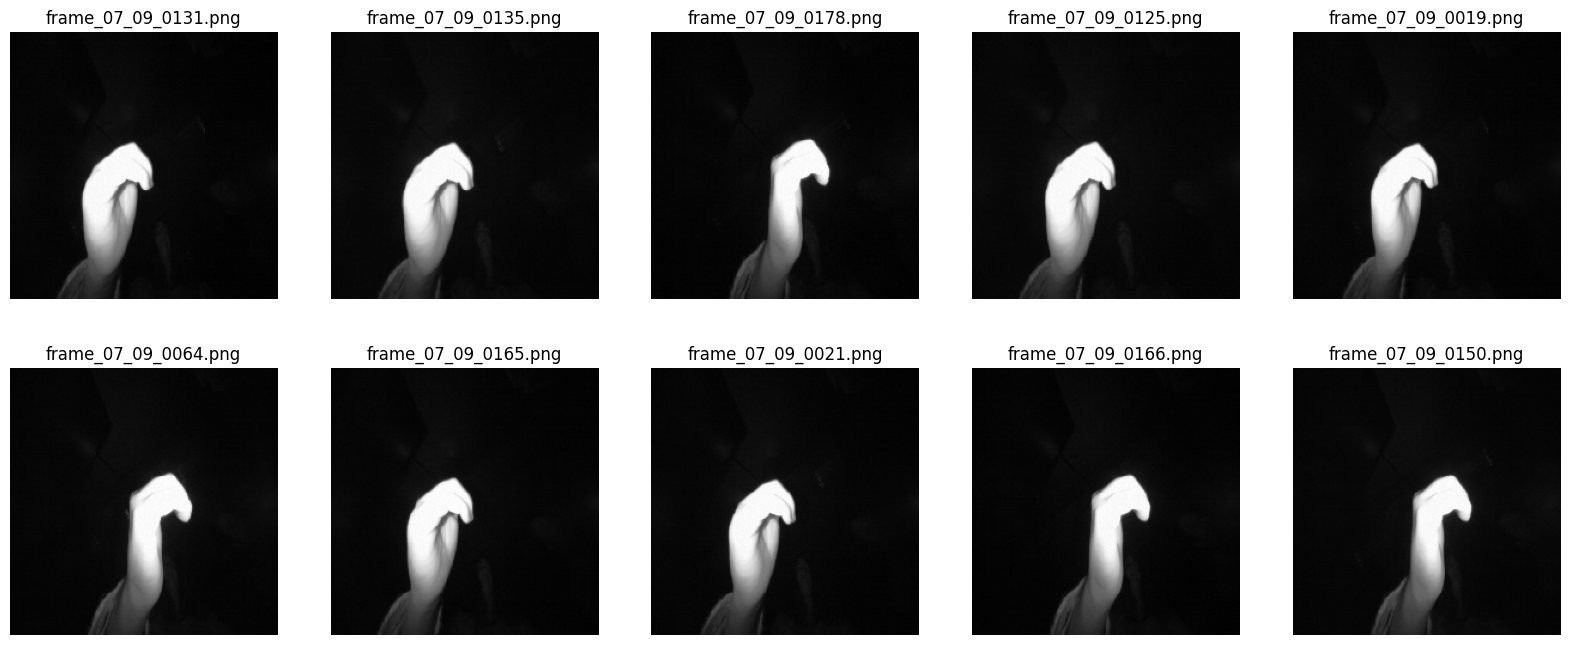

In [23]:
def get_file_paths_09_c(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '09_c')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_09_c = get_file_paths_09_c(dataset_path)
display_images(file_paths_09_c)

# Function to Print 10 Images from '10_down'

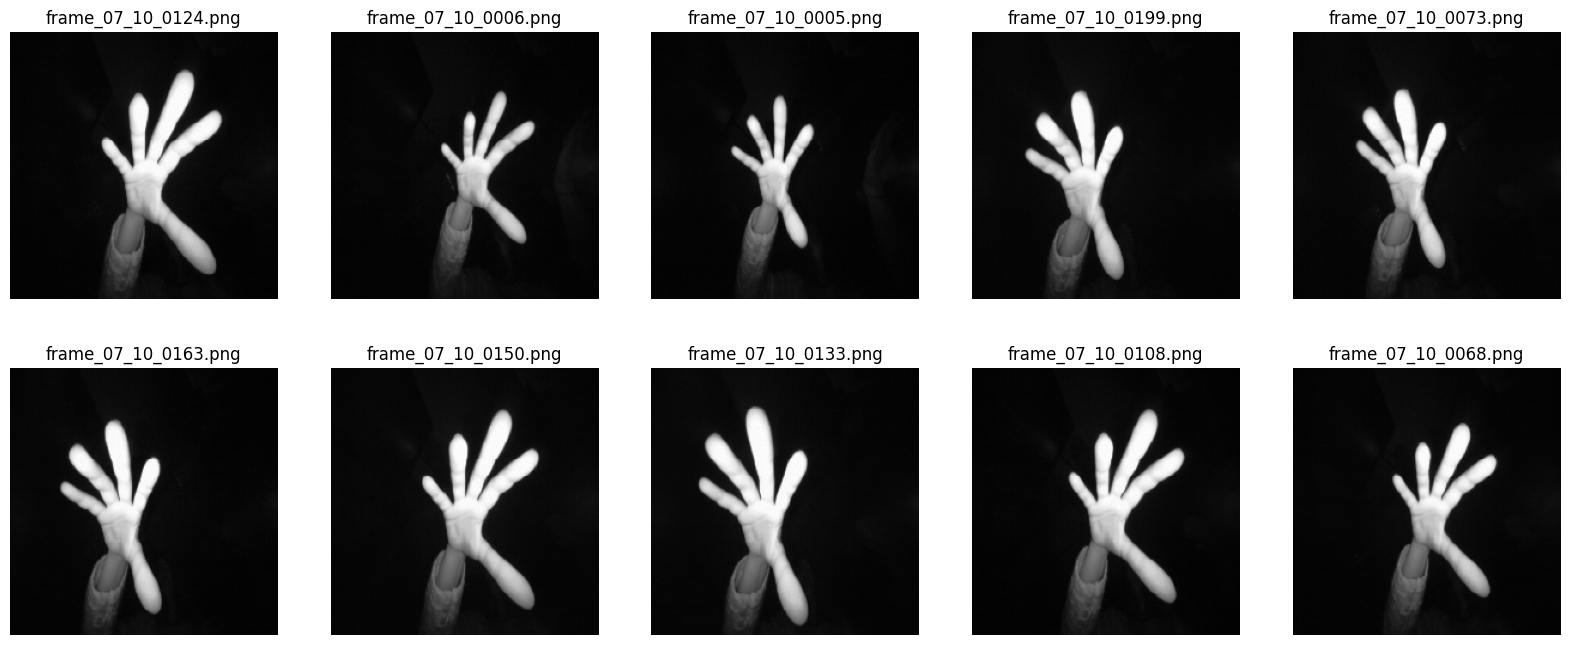

In [24]:
def get_file_paths_10_down(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '10_down')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_10_down = get_file_paths_10_down(dataset_path)
display_images(file_paths_10_down)

# Shuffle the data

In [25]:
data = list(zip(file_paths, labels))
np.random.shuffle(data)
file_paths, labels = zip(*data)

# Convert labels to strings

In [26]:
labels_str = [str(label) for label in labels]

# Create a dataframe with file paths and label

In [27]:
dataframe = pd.DataFrame({'filename': file_paths, 'class': labels_str})

# Create ImageDataGenerator for training and validation

In [28]:
datagen = ImageDataGenerator(
    rescale=1/255.0,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2  # Reserve 20% of the data for validation
)

train_generator = datagen.flow_from_dataframe(
    dataframe=dataframe,
    x_col='filename',
    y_col='class',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=dataframe,
    x_col='filename',
    y_col='class',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 16000 validated image filenames belonging to 10 classes.
Found 4000 validated image filenames belonging to 10 classes.


# Define a simple CNN model

In [29]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Model Summary

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,401,226 (169.38 MB)

 Trainable params: 44,401,226 (169.38 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [31]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping

In [32]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

# Train the model with early stopping

In [33]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/20


2025-08-18 17:44:59.371696: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49284: 7.84353, expected 6.92193
2025-08-18 17:44:59.371759: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49286: 7.76792, expected 6.84632
2025-08-18 17:44:59.371777: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49287: 6.15631, expected 5.23472
2025-08-18 17:44:59.371792: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49288: 6.71859, expected 5.797
2025-08-18 17:44:59.371804: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49289: 7.43913, expected 6.51753
2025-08-18 17:44:59.371814: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49290: 7.1783, expected 6.25671
2025-08-18 17:44:59.371824: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49291: 6.06838, expected 5.14679
2025-08-18 17:44:59.371836: E 

  1/500 ━━━━━━━━━━━━━━━━━━━━ 2:01:25 15s/step - accuracy: 0.0625 - loss: 2.3066

I0000 00:00:1755539105.637823     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


500/500 ━━━━━━━━━━━━━━━━━━━━ 380s 732ms/step - accuracy: 0.2876 - loss: 1.9798 - val_accuracy: 0.7803 - val_loss: 0.7597
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 236s 467ms/step - accuracy: 0.7447 - loss: 0.7825 - val_accuracy: 0.9190 - val_loss: 0.3027
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 235s 465ms/step - accuracy: 0.8651 - loss: 0.4118 - val_accuracy: 0.9525 - val_loss: 0.1741
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 232s 460ms/step - accuracy: 0.9083 - loss: 0.2834 - val_accuracy: 0.9730 - val_loss: 0.1087
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 233s 460ms/step - accuracy: 0.9301 - loss: 0.2124 - val_accuracy: 0.9787 - val_loss: 0.0837
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 236s 466ms/step - accuracy: 0.9424 - loss: 0.1803 - val_accuracy: 0.9825 - val_loss: 0.0658
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 234s 463ms/step - accuracy: 0.9577 - loss: 0.1414 - val_accuracy: 0.9887 - val_loss: 0.0506
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 233s 461ms/step - accuracy: 0.9611 - loss: 0.12

# Plot the training history

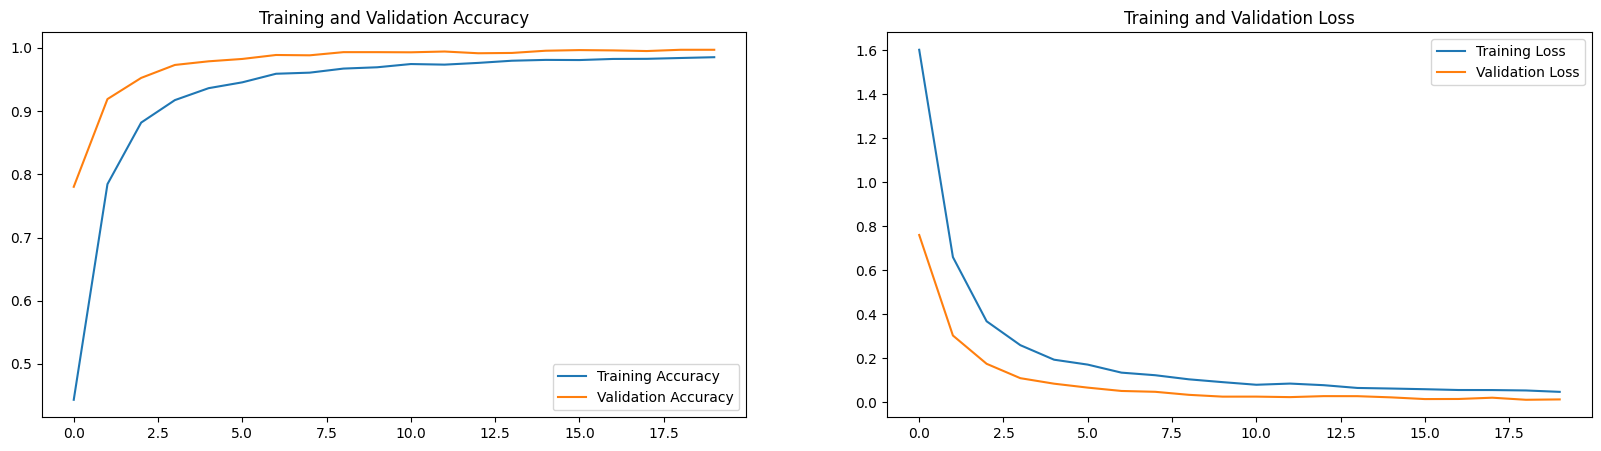

In [34]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)


# Evaluate the model

In [35]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 47s 374ms/step - accuracy: 0.9954 - loss: 0.0134
Validation Loss: 0.011455009691417217
Validation Accuracy: 0.9965000152587891


# Save the model

In [36]:
model.save('hand_gesture_recognition_model.h5')

# Define the image size and gesture names

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [38]:
img_size = 224
gesture_classes = [
    '01_palm', '02_l', '03_fist', '04_fist_moved', 
    '05_thumb', '06_index', '07_ok', '08_palm_moved', 
    '09_c', '10_down'
]

# Function to load an image, predict the gesture, and display the result

2025-08-18 19:10:30.557393: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147863: 4.14435, expected 3.59734
2025-08-18 19:10:30.557460: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148032: 3.73171, expected 3.1847
2025-08-18 19:10:30.557471: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148049: 4.2981, expected 3.75109
2025-08-18 19:10:30.557484: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149297: 4.2275, expected 3.68049
2025-08-18 19:10:30.557492: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149362: 3.89754, expected 3.35053
2025-08-18 19:10:30.557500: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149444: 4.35104, expected 3.80403
2025-08-18 19:10:30.557509: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149482: 4.25819, expected 3.71118
2025-08-18 19:10:30.557

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


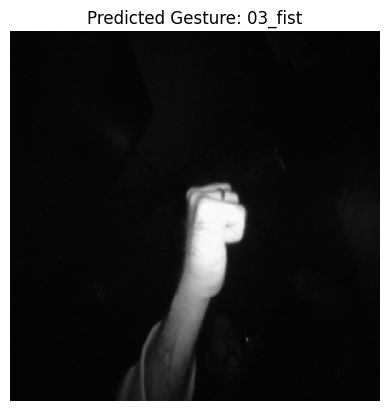

In [39]:
def load_predict_and_display(img_path, model, img_size):
    # Load and preprocess the image (RGB)
    img = load_img(img_path, color_mode='rgb', target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the gesture
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Display the image and the predicted class
    plt.imshow(img_array.squeeze(), cmap='gray')  # Remove 'cmap' if image is in RGB
    plt.title(f'Predicted Gesture: {gesture_classes[predicted_class]}')
    plt.axis('off')
    plt.show()

# Load the trained model
loaded_model = load_model('hand_gesture_recognition_model.h5')

# Example image path (change this to any image you want to test)
test_img_path = '/kaggle/input/leapgestrecog/leapGestRecog/04/04_fist_moved/frame_04_04_0004.png'  # Replace with your image path
img_size = 224  # Ensure this matches the size used during training

# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


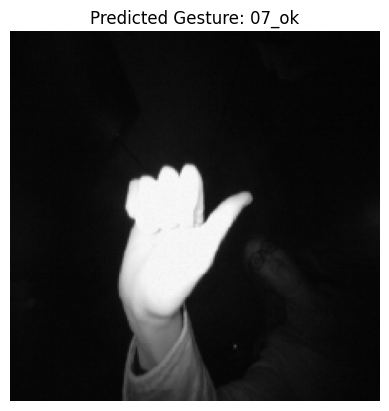

In [40]:
test_img_path = '/kaggle/input/leapgestrecog/leapGestRecog/00/05_thumb/frame_00_05_0005.png'  # Replace with your image path
img_size = 224  # Ensure this matches the size used during training

# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


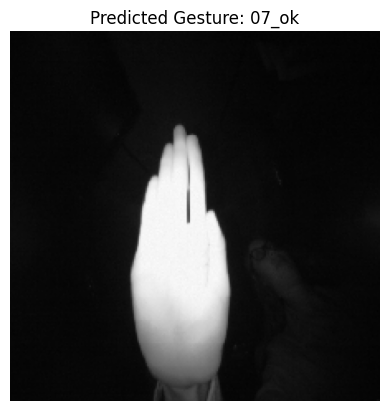

In [41]:
test_img_path = '/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0022.png'  # Replace with your image path
img_size = 224  # Ensure this matches the size used during training

# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)

# Thank You !